In [4]:
import numpy as np
import awkward as ak
import uproot

import hist
import topcoffea.modules.utils as utils

import mplhep as hep
import matplotlib.pyplot as plt

In [5]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20, 
          'lines.markersize':5}
plt.rcParams.update(params)

In [1]:
def get_ratio_uncertainty(num_hist, denom_hist):
    xvals = num_hist.axes.centers[0]
    yvals_num = num_hist.values()
    yvals_denom = denom_hist.values()
    sigma_num = np.sqrt(num_hist.variances())
    sigma_denom = np.sqrt(denom_hist.variances())

    ratio = np.divide(yvals_num, yvals_denom)

    # calculation for error propagation for ratio = yavls_num/yvals_denom
    # generally, z=x/y; sigma_z = abs(z)sqrt((sigma_x/x)^2+(sigma_y/y)^2)
    sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom)))))

    return sigma_y

In [2]:
def get_ratio_points(hist1, histSM):
    num = hist1.values()
    centers = hist1.axes.centers[0]
    denomSM = histSM.values()
    ratio = np.divide(num, denomSM)

    return centers, ratio

In [3]:
def make_plot_with_ratio(h_num, h_denom, label_num, label_denom, xlabel, title):
    ## get ratios and uncertainties
    centers, ratio = get_ratio_points(h_num, h_denom)
    uncert = get_ratio_uncertainty(h_num, h_denom)

    ## Initialize figure and axes
    # fig, ax = plt.subplots()
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10,12),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.1)

    ## Plot histograms and ratio plot
    hep.histplot(h_num, ax=ax, stack=False, yerr=True, label=label_num)
    hep.histplot(h_denom, ax=ax, stack=False, yerr=True, label=label_denom)
    rax.scatter(centers, ratio)
    rax.errorbar(centers, ratio, xerr = None, yerr = uncert, capsize=5, ls='none')

    ## Formatting
    ax.legend(loc = 'upper right', fontsize = 'small')
    ax.set_ylabel("Events", fontsize='medium')
    ax.set_xlabel("")
    rax.set_ylabel("Ratio", fontsize='medium')
    rax.set_xlabel(xlabel, fontsize="medium")
    rax.set_ylim([0, 2])
    rax.grid(axis='y')
    plt.figtext(0.13, 0.9, title, fontsize='small')

    return fig

# October 28

In [ ]:
## pickle files produced with gen_hist_processor.py, histograms reweighted to the starting point
fin1 = "2810_ttbarEFT_0_700.pkl.gz"
fin2 = "2810_ttbarEFT_700_900.pkl.gz"
fin3 = "2810_ttbarEFT_900_Inf.pkl.gz"
fin4 = "2810_ttbarEFT_nanogen.pkl.gz"
hists1 = utils.get_hist_from_pkl(fin1, allow_empty=False)
hists2 = utils.get_hist_from_pkl(fin2, allow_empty=False)
hists3 = utils.get_hist_from_pkl(fin3, allow_empty=False)
hists4 = utils.get_hist_from_pkl(fin4, allow_empty=False)
print(hists1)

In [ ]:
# making histograms reweighted to the starting point
for name in hists1:
    h_central = hists1[name]+hists2[name]+hists3[name]
    h_nanogen = hists4[name]
    fig = make_plot_with_ratio(h_central, h_nanogen, "central", "nanogen", name, "Reweighted to starting point")
    figname = "2810_"+name+"_stpt.png"
    # fig.savefig(figname)
    # plt.close(fig)

In [ ]:
## pickle files produced with gen_hist_processor.py, histograms reweighted to the SM
fin1 = "2810_ttbarEFT_0_700_SM.pkl.gz"
fin2 = "2810_ttbarEFT_700_900_SM.pkl.gz"
fin3 = "2810_ttbarEFT_900_Inf_SM.pkl.gz"
fin4 = "2810_ttbarEFT_nanogen_SM.pkl.gz"
hists1 = utils.get_hist_from_pkl(fin1, allow_empty=False)
hists2 = utils.get_hist_from_pkl(fin2, allow_empty=False)
hists3 = utils.get_hist_from_pkl(fin3, allow_empty=False)
hists4 = utils.get_hist_from_pkl(fin4, allow_empty=False)
print(hists1)

In [ ]:
## making histograms reweighted to the SM
for name in hists1:
    h_central = hists1[name]+hists2[name]+hists3[name]
    h_nanogen = hists4[name]
    fig = make_plot_with_ratio(h_central, h_nanogen, "central", "nanogen", name, "Reweighted to SM")
    figname = "2810_"+name+"_SM.png"
    # fig.savefig(figname)
    # plt.close(fig)

In [ ]:
## pickle files produced with gen_hist_eventweights_processor.py
fin1 = "2910_eventweights_0_700.pkl.gz"
fin2 = "2910_eventweights_700_900.pkl.gz"
fin3 = "2910_eventweights_900_Inf.pkl.gz"
fin4 = "2910_eventweights_nanogen.pkl.gz"
hists1 = utils.get_hist_from_pkl(fin1, allow_empty=False)
hists2 = utils.get_hist_from_pkl(fin2, allow_empty=False)
hists3 = utils.get_hist_from_pkl(fin3, allow_empty=False)
hists4 = utils.get_hist_from_pkl(fin4, allow_empty=False)
print(hists1)

In [ ]:
name = 'weights_SM_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_SMlog.png")

In [ ]:
name = 'weights_stpt_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_stptlog.png")

In [ ]:
name = 'weights_pt1_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_pt1log.png")

In [ ]:
name = 'weights_pt3_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
# ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_pt3log.png")

In [ ]:
name = 'weights_pt5_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
# ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_pt5log.png")

## November 5-6, 2024
### Kinematic plots

In [18]:
f16APV_low_stpt = "UL16APV_0_700_kin_stpt.pkl.gz"	
f16APV_med_stpt = "UL16APV_700_900_kin_stpt.pkl.gz" 
f16APV_high_stpt = "UL16APV_900_Inf_kin_stpt.pkl.gz"

f16_low_stpt = "UL16_0_700_kin_stpt.pkl.gz"	
f16_med_stpt = "UL16_700_900_kin_stpt.pkl.gz" 
f16_high_stpt = "UL16_900_Inf_kin_stpt.pkl.gz"

f17_low_stpt = "UL17_0_700_kin_stpt.pkl.gz"
f17_med_stpt = "UL17_700_900_kin_stpt.pkl.gz"
f17_high_stpt = "UL17_900_Inf_kin_stpt.pkl.gz"

f18_low_stpt = "UL18_0_700_kin_stpt.pkl.gz"    
f18_med_stpt = "UL18_700_900_kin_stpt.pkl.gz"
f18_high_stpt = "UL18_900_Inf_kin_stpt.pkl.gz"

fnanogen_stpt = "2810_ttbarEFT_nanogen.pkl.gz"

In [19]:
h16APV_low_stpt = utils.get_hist_from_pkl(f16APV_low_stpt, allow_empty=False)
h16APV_med_stpt = utils.get_hist_from_pkl(f16APV_med_stpt, allow_empty=False)
h16APV_high_stpt = utils.get_hist_from_pkl(f16APV_high_stpt, allow_empty=False)

h16_low_stpt = utils.get_hist_from_pkl(f16_low_stpt, allow_empty=False)
h16_med_stpt = utils.get_hist_from_pkl(f16_med_stpt, allow_empty=False)
h16_high_stpt = utils.get_hist_from_pkl(f16_high_stpt, allow_empty=False)

h17_low_stpt = utils.get_hist_from_pkl(f17_low_stpt, allow_empty=False)
h17_med_stpt = utils.get_hist_from_pkl(f17_med_stpt, allow_empty=False)
h17_high_stpt = utils.get_hist_from_pkl(f17_high_stpt, allow_empty=False)

h18_low_stpt = utils.get_hist_from_pkl(f18_low_stpt, allow_empty=False)
h18_med_stpt = utils.get_hist_from_pkl(f18_med_stpt, allow_empty=False)
h18_high_stpt = utils.get_hist_from_pkl(f18_high_stpt, allow_empty=False)

hnanogen_stpt = utils.get_hist_from_pkl(fnanogen_stpt, allow_empty=False)

In [20]:
f16APV_low_SM = "UL16APV_0_700_kin_SM.pkl.gz"	
f16APV_med_SM = "UL16APV_700_900_kin_SM.pkl.gz" 
f16APV_high_SM = "UL16APV_900_Inf_kin_SM.pkl.gz"

f16_low_SM = "UL16_0_700_kin_SM.pkl.gz"	
f16_med_SM = "UL16_700_900_kin_SM.pkl.gz" 
f16_high_SM = "UL16_900_Inf_kin_SM.pkl.gz"

f17_low_SM = "UL17_0_700_kin_SM.pkl.gz"
f17_med_SM = "UL17_700_900_kin_SM.pkl.gz"
f17_high_SM = "UL17_900_Inf_kin_SM.pkl.gz"

f18_low_SM = "UL18_0_700_kin_SM.pkl.gz"    
f18_med_SM = "UL18_700_900_kin_SM.pkl.gz"
f18_high_SM = "UL18_900_Inf_kin_SM.pkl.gz"

fnanogen_SM = "2810_ttbarEFT_nanogen_SM.pkl.gz"

In [21]:
h16APV_low_SM = utils.get_hist_from_pkl(f16APV_low_SM, allow_empty=False)
h16APV_med_SM = utils.get_hist_from_pkl(f16APV_med_SM, allow_empty=False)
h16APV_high_SM = utils.get_hist_from_pkl(f16APV_high_SM, allow_empty=False)

h16_low_SM = utils.get_hist_from_pkl(f16_low_SM, allow_empty=False)
h16_med_SM = utils.get_hist_from_pkl(f16_med_SM, allow_empty=False)
h16_high_SM = utils.get_hist_from_pkl(f16_high_SM, allow_empty=False)

h17_low_SM = utils.get_hist_from_pkl(f17_low_SM, allow_empty=False)
h17_med_SM = utils.get_hist_from_pkl(f17_med_SM, allow_empty=False)
h17_high_SM = utils.get_hist_from_pkl(f17_high_SM, allow_empty=False)

h18_low_SM = utils.get_hist_from_pkl(f18_low_SM, allow_empty=False)
h18_med_SM = utils.get_hist_from_pkl(f18_med_SM, allow_empty=False)
h18_high_SM = utils.get_hist_from_pkl(f18_high_SM, allow_empty=False)

hnanogen_SM = utils.get_hist_from_pkl(fnanogen_SM, allow_empty=False)

In [32]:
ULyear = "UL18"

In [33]:
if ULyear == "UL16APV": 
    hists1 = h16APV_low_SM
    hists2 = h16APV_med_SM
    hists3 = h16APV_high_SM
    hists4 = hnanogen_SM  
elif ULyear == "UL16": 
    hists1 = h16_low_SM
    hists2 = h16_med_SM
    hists3 = h16_high_SM
    hists4 = hnanogen_SM   
elif ULyear == "UL17":
    hists1 = h17_low_SM
    hists2 = h17_med_SM
    hists3 = h17_high_SM
    hists4 = hnanogen_SM
elif ULyear == "UL18":
    hists1 = h18_low_SM
    hists2 = h18_med_SM
    hists3 = h18_high_SM
    hists4 = hnanogen_SM
else: 
    print("no valid ULyear set")

In [113]:
# making histograms reweighted to the starting point
for name in hists1:
    h_central = hists1[name]+hists2[name]+hists3[name]
    h_nanogen = hists4[name]
    fig = make_plot_with_ratio(h_central, h_nanogen, "central-"+ULyear, "nanogen", name, "Reweighted to SM")
    # fig.show()
    figname = "0611_"+ULyear+"_"+name+"_SM.png"
    fig.savefig(figname)
    plt.close(fig)

/tmp/ipykernel_2371603/522512218.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_2371603/3457844619.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_2371603/3457844619.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom)))))
/tmp/ipykernel_2371603/522512218.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_2371603/3457844619.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_2371603/3457844619.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom))

In [29]:
if ULyear == "UL16APV": 
    hists1 = h16APV_low_stpt
    hists2 = h16APV_med_stpt
    hists3 = h16APV_high_stpt
    hists4 = hnanogen_stpt  
elif ULyear == "UL16": 
    hists1 = h16_low_stpt
    hists2 = h16_med_stpt
    hists3 = h16_high_stpt
    hists4 = hnanogen_stpt 
elif ULyear == "UL17":
    hists1 = h17_low_stpt
    hists2 = h17_med_stpt
    hists3 = h17_high_stpt
    hists4 = hnanogen_stpt
elif ULyear == "UL18":
    hists1 = h18_low_stpt
    hists2 = h18_med_stpt
    hists3 = h18_high_stpt
    hists4 = hnanogen_stpt
else: 
    print("no valid ULyear set")

In [71]:
# making histograms reweighted to the starting point
for name in hists1:
    h_central = hists1[name]+hists2[name]+hists3[name]
    h_nanogen = hists4[name]
    fig = make_plot_with_ratio(h_central, h_nanogen, "central"+ULyear, "nanogen", name, "Reweighted to stpt")
    # fig.show()
    figname = "0611_"+ULyear+"_"+name+"_stpt.png"
    fig.savefig(figname)
    plt.close(fig)

/tmp/ipykernel_2371603/522512218.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_2371603/3457844619.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_2371603/3457844619.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom)))))
/tmp/ipykernel_2371603/522512218.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(num, denomSM)
/tmp/ipykernel_2371603/3457844619.py:8: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(yvals_num, yvals_denom)
/tmp/ipykernel_2371603/3457844619.py:12: RuntimeWarning: invalid value encountered in divide
  sigma_y = np.multiply(np.abs(ratio), np.sqrt(np.add(np.square(np.divide(sigma_num, yvals_num)), np.square(np.divide(sigma_denom, yvals_denom))

Text(0.13, 0.9, 'UL17 Reweighted to SM')

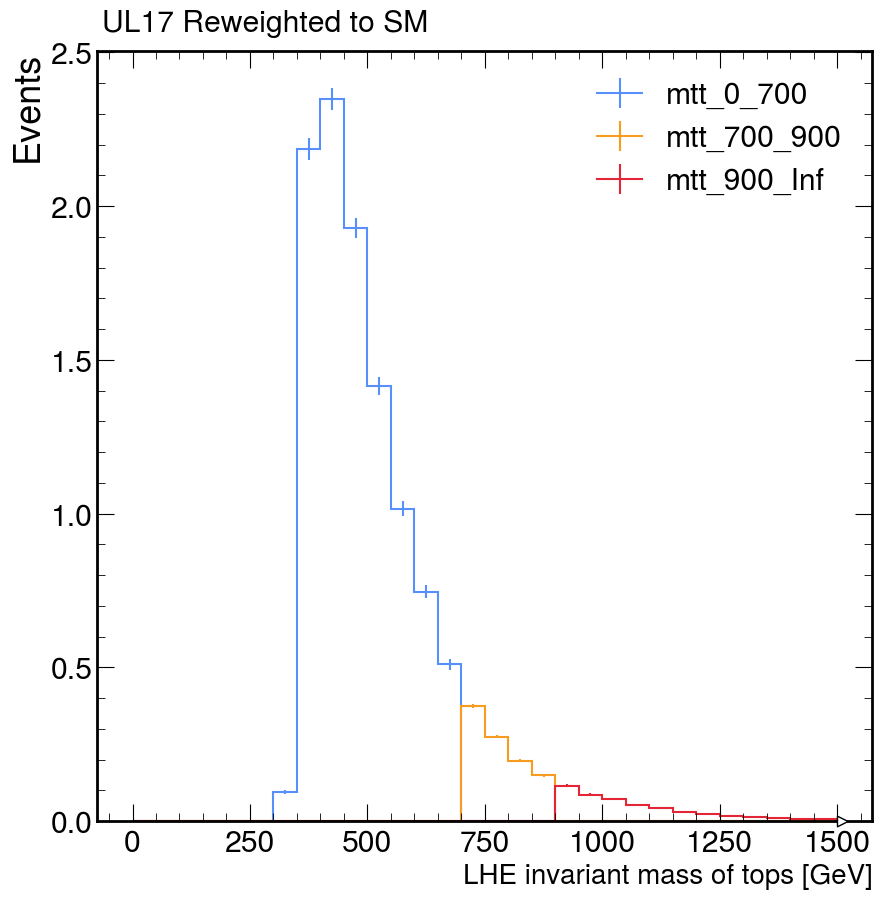

In [34]:
## CHECK LHE MTT DISTRIBUTION ##

name = 'lhe_mtt'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
# hep.histplot(h4, ax=ax, stack=False, yerr=True, label="nanogen")
hep.histplot(h1, ax=ax, stack=False, yerr=True, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=True, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=True, label="mtt_900_Inf")

ax.legend(loc = 'upper right', fontsize = 'small')
ax.set_ylabel("Events", fontsize='medium')
plt.figtext(0.13, 0.9, "UL17 Reweighted to SM", fontsize='small')

# ax.set_xlim([-6,1])
# plt.show()

Text(0.13, 0.9, 'UL18 at Starting Point')

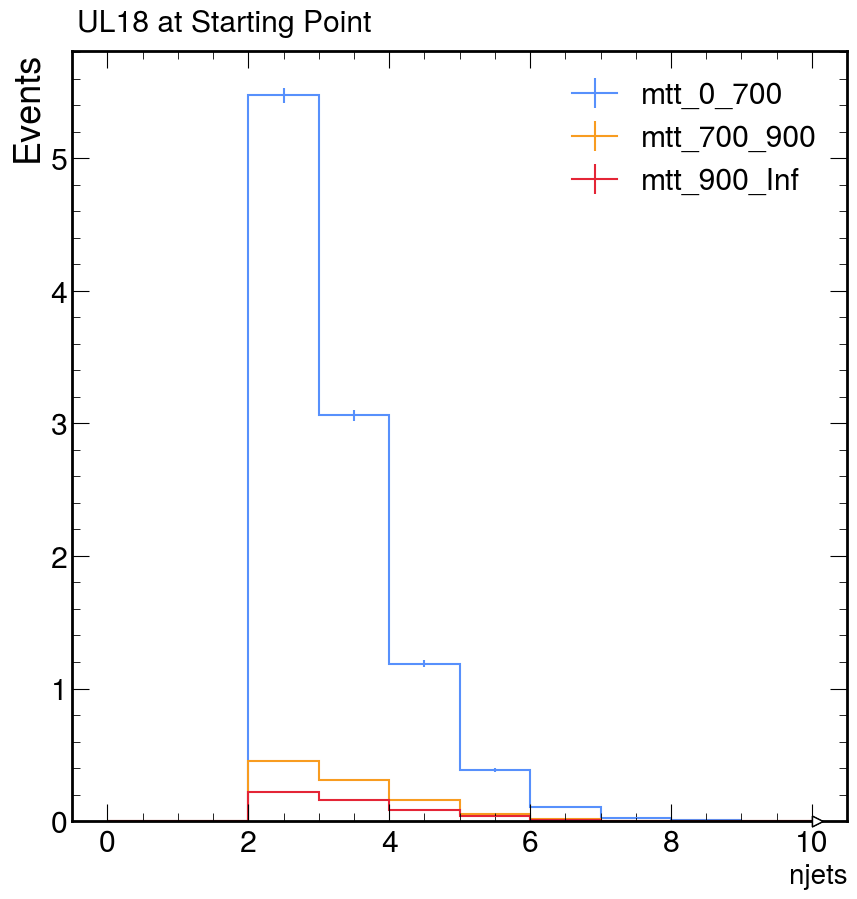

In [36]:
name = 'njets'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
# hep.histplot(h4, ax=ax, stack=False, yerr=True, label="nanogen")
hep.histplot(h1, ax=ax, stack=False, yerr=True, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=True, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=True, label="mtt_900_Inf")

ax.legend(loc = 'upper right', fontsize = 'small')
ax.set_ylabel("Events", fontsize='medium')
plt.figtext(0.13, 0.9, "UL18 at Starting Point", fontsize='small')

# ax.set_xlim([-6,1])
# plt.show()

## November 5-6, 2024
### Event Weight plots

In [115]:
f16APV_low_eventweights = "UL16APV_0_700_eventweights.pkl.gz"	
f16APV_med_eventweights = "UL16APV_700_900_eventweights.pkl.gz" 
f16APV_high_eventweights = "UL16APV_900_Inf_eventweights.pkl.gz"

f16_low_eventweights = "UL16_0_700_eventweights.pkl.gz"	
f16_med_eventweights = "UL16_700_900_eventweights.pkl.gz" 
f16_high_eventweights = "UL16_900_Inf_eventweights.pkl.gz"

f17_low_eventweights = "UL17_0_700_eventweights.pkl.gz"
f17_med_eventweights = "UL17_700_900_eventweights.pkl.gz"
f17_high_eventweights = "UL17_900_Inf_eventweights.pkl.gz"

f18_low_eventweights = "UL18_0_700_eventweights.pkl.gz"    
f18_med_eventweights = "UL18_700_900_eventweights.pkl.gz"
f18_high_eventweights = "UL18_900_Inf_eventweights.pkl.gz"

In [116]:
h16APV_low_eventweights = utils.get_hist_from_pkl(f16APV_low_eventweights, allow_empty=False)
h16APV_med_eventweights = utils.get_hist_from_pkl(f16APV_med_eventweights, allow_empty=False)
h16APV_high_eventweights = utils.get_hist_from_pkl(f16APV_high_eventweights, allow_empty=False)

h16_low_eventweights = utils.get_hist_from_pkl(f16_low_eventweights, allow_empty=False)
h16_med_eventweights = utils.get_hist_from_pkl(f16_med_eventweights, allow_empty=False)
h16_high_eventweights = utils.get_hist_from_pkl(f16_high_eventweights, allow_empty=False)

h17_low_eventweights = utils.get_hist_from_pkl(f17_low_eventweights, allow_empty=False)
h17_med_eventweights = utils.get_hist_from_pkl(f17_med_eventweights, allow_empty=False)
h17_high_eventweights = utils.get_hist_from_pkl(f17_high_eventweights, allow_empty=False)

h18_low_eventweights = utils.get_hist_from_pkl(f18_low_eventweights, allow_empty=False)
h18_med_eventweights = utils.get_hist_from_pkl(f18_med_eventweights, allow_empty=False)
h18_high_eventweights = utils.get_hist_from_pkl(f18_high_eventweights, allow_empty=False)

In [75]:
print(h18_low_eventweights.keys())

dict_keys(['weights_SM', 'weights_SM_log', 'weights_stpt', 'weights_stpt_log', 'weights_pt1_log', 'weights_pt3_log', 'weights_pt5_log'])


In [117]:
hists_to_make = ['weights_SM_log', 'weights_stpt_log', 'weights_pt1_log', 'weights_pt3_log', 'weights_pt5_log']

In [118]:
hists_UL16APV = [h16APV_low_eventweights, h16APV_med_eventweights, h16APV_high_eventweights]
hists_UL16 = [h16_low_eventweights, h16_med_eventweights, h16_high_eventweights]
hists_UL17 = [h17_low_eventweights, h17_med_eventweights, h17_high_eventweights]
hists_UL18 = [h18_low_eventweights, h18_med_eventweights, h18_high_eventweights]

In [ ]:
name = 'weights_stpt_log'
h1 = hists1[name]
h2 = hists2[name]
h3 = hists3[name]
h4 = hists4[name]

fig, ax = plt.subplots()
hep.histplot(h1, ax=ax, stack=False, yerr=False, label="mtt_0_700")
hep.histplot(h2, ax=ax, stack=False, yerr=False, label="mtt_700_900")
hep.histplot(h3, ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
hep.histplot(h4, ax=ax, stack=False, yerr=False, label="nanogen")

ax.legend(loc = 'upper left', fontsize = 'small')
ax.set_xlim([-6,1])
plt.show()
# fig.savefig("2910_eventweights_stptlog.png")

In [119]:
h = hists_UL16APV
title = "centralUL16APV"

for hname in hists_to_make:
    fig, ax = plt.subplots()
    hep.histplot(h[0][hname], ax=ax, stack=False, yerr=False, label="mtt_0_700")
    hep.histplot(h[1][hname], ax=ax, stack=False, yerr=False, label="mtt_700_900")
    hep.histplot(h[2][hname], ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
    
    plt.figtext(0.13, 0.9, title, fontsize='small')
    ax.legend(loc = 'upper left', fontsize = 'small')
    ax.set_xlim([-6,1])

    figname = "UL16APV_"+hname+".png"
    print(figname)
    fig.savefig(figname)
    plt.close(fig)
        
    # plt.show()

UL16APV_weights_SM_log.png
UL16APV_weights_stpt_log.png
UL16APV_weights_pt1_log.png
UL16APV_weights_pt3_log.png
UL16APV_weights_pt5_log.png


In [90]:
h = hists_UL16
title = "centralUL16"

for hname in hists_to_make:
    fig, ax = plt.subplots()
    hep.histplot(h[0][hname], ax=ax, stack=False, yerr=False, label="mtt_0_700")
    hep.histplot(h[1][hname], ax=ax, stack=False, yerr=False, label="mtt_700_900")
    hep.histplot(h[2][hname], ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
    
    plt.figtext(0.13, 0.9, title, fontsize='small')
    ax.legend(loc = 'upper left', fontsize = 'small')
    ax.set_xlim([-6,1])

    figname = "UL16_"+hname+".png"
    print(figname)
    fig.savefig(figname)
    plt.close(fig)
        
    # plt.show()

UL16_weights_SM_log.png
UL16_weights_stpt_log.png
UL16_weights_pt1_log.png
UL16_weights_pt3_log.png
UL16_weights_pt5_log.png


In [91]:
h = hists_UL17
title = "centralUL17"

for hname in hists_to_make:
    fig, ax = plt.subplots()
    hep.histplot(h[0][hname], ax=ax, stack=False, yerr=False, label="mtt_0_700")
    hep.histplot(h[1][hname], ax=ax, stack=False, yerr=False, label="mtt_700_900")
    hep.histplot(h[2][hname], ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
    
    plt.figtext(0.13, 0.9, title, fontsize='small')
    ax.legend(loc = 'upper left', fontsize = 'small')
    ax.set_xlim([-6,1])

    figname = "UL17_"+hname+".png"
    print(figname)
    fig.savefig(figname)
    plt.close(fig)
        
    # plt.show()

UL17_weights_SM_log.png
UL17_weights_stpt_log.png
UL17_weights_pt1_log.png
UL17_weights_pt3_log.png
UL17_weights_pt5_log.png


In [92]:
h = hists_UL18
title = "centralUL18"

for hname in hists_to_make:
    fig, ax = plt.subplots()
    hep.histplot(h[0][hname], ax=ax, stack=False, yerr=False, label="mtt_0_700")
    hep.histplot(h[1][hname], ax=ax, stack=False, yerr=False, label="mtt_700_900")
    hep.histplot(h[2][hname], ax=ax, stack=False, yerr=False, label="mtt_900_Inf")
    
    plt.figtext(0.13, 0.9, title, fontsize='small')
    ax.legend(loc = 'upper left', fontsize = 'small')
    ax.set_xlim([-6,1])

    figname = "UL18_"+hname+".png"
    print(figname)
    fig.savefig(figname)
    plt.close(fig)
        
    # plt.show()

UL18_weights_SM_log.png
UL18_weights_stpt_log.png
UL18_weights_pt1_log.png
UL18_weights_pt3_log.png
UL18_weights_pt5_log.png
